## Machine Learning
확률값을 찾는 것. MLE와 MAP.   
확률
- P(A=true) , 사건 A가 true일 확률. P는 상대적 빈도.
- 특정 사건이 발생할 확률이 얼마나 되는지 반환해주는 함수.
- 빈도를 통해 추정 -> 당연히 데이터로부터 나올 수 밖에 없다. 즉, 양질의 데이터가 많이 필요하다.
- 상대적 빈도가 중요하기 때문에 양 쪽 케이스가 모두 있어야 한다.
- 편향되면 확률값이 특정 케이스에 쏠린다.
- 빈도 기반
  - frequentist Approach(MLE)
  - Bayesian Approach(MAP)

### MLE(Maximum Likelihood Estimation)
p를 모르는게 문제! 확률값이 최대가 되는 값을 어떻게 잘 추정할까??   
Finding out the best candidate of `theta` -> `theta^`
- 너무 작은 값이라 계산이 편하도록 log likelihood를 이용한다.
- 정확한 값을 찾는 것이 아니라, argmax를 구하는 거니까 상관없다.
PAC Learning
- error bound = P(|`theta^`-`theta_real`|>=`ee`) <= 2e^(-2N`ee`^2)
  - N, 즉 시행횟수가 많으면 error bound가 작아진다.

### MAP(Maximum A Posteriori estimation)
보통 순열 - 다음 확률에 영향을 미치는 것을 파악하는 방법   
posterior를 maximize하는 것이 목표   
- P(D)는 굳이 계산될 필요 없다 -> constant로 만들어버린다.
- `alpha`와 `beta`는 aH,aT가 커질 때 무의미해진다.
- 하지만 현재 시점의 데이터는 절대 얻을 수 없다. 즉, 데이터는 절대 충분할 수 없다.
- 그래서 `alpha`,`beta`가 중요해진다.


# Linear Regression

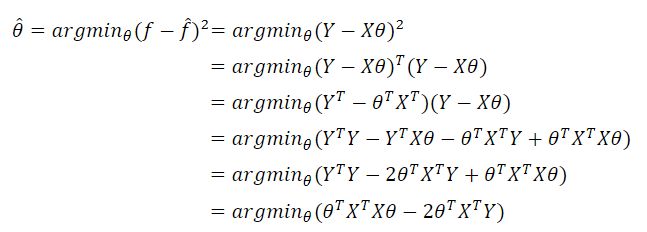
- $Y^TY$는 constant하다 => 영향이 없다 => 삭제해도 무방!

In [53]:
# 날코딩합시다!

from sklearn import datasets
data = datasets.load_boston()

In [26]:
data.feature_names, data.target

(array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14

In [27]:
# 현재 13개 차원이므로 축 하나만 선택해서 쓰겠다.
# x, y로 2차 방정식을 만들기 위해서!

X = data.data[:,0]
X.shape

(506,)

$$
h:\hat{f}(x;\theta) 
= \theta_0 + \sum_{i=1}^n{\theta_i x_i} 
$$

$i$가 1부터 시작하고, $\theta_0$은 따로 더하기를 한다.  
$x_0$이 1이라고 가정하면, $\sum$이 $i=0$부터 시작하고 $\theta_0$을 $\sum$ 안에 넣을 수 있다.

$$
\theta_0 + \sum_{i=1}^n{\theta_i x_i} 
= \sum_{i=0}^n{\theta_i x_i}
$$

In [28]:
# 더미 데이터 추가하기 (x0 = 1)
# 세타_0 더하기를 summation에 포함시켜서 한번에 계산하기 위해서. 

import numpy as np

X = np.c_[np.ones(data.data.shape[0]), X]
Y = data.target

X.shape, Y.shape

((506, 2), (506,))

In [29]:
import matplotlib.pyplot as plt

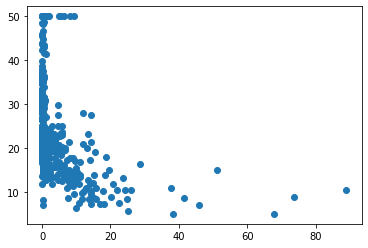

In [30]:
%matplotlib inline

plt.scatter(X[:,1], Y)
plt.show()

In [31]:
Theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

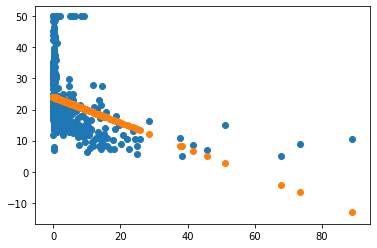

In [32]:
%matplotlib inline

plt.scatter(X[:,1], Y)
plt.scatter(X[:,1], X.dot(Theta))
plt.show()

> 직선으로는 정확하게 분류하지 못한다.

---

# 제곱해서 비선형으로 만들기

In [33]:
# np.power => 제곱함수
# polynominal?

X = np.c_[X, np.power(X[:,1], 2)]
X = np.c_[X, np.power(X[:,1], 3)]
X = np.c_[X, np.power(X[:,1], 4)]
X = np.c_[X, np.power(X[:,1], 5)]
X = np.c_[X, np.power(X[:,1], 6)]
X = np.c_[X, np.power(X[:,1], 7)]
X = np.c_[X, np.power(X[:,1], 8)]

In [34]:
# shape은 제곱한 수만큼 차원이 늘어남

X.shape

(506, 9)

In [35]:
Theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

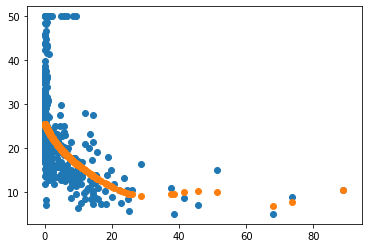

In [36]:
plt.scatter(X[:,1], Y)
plt.scatter(X[:,1], X.dot(Theta))
plt.show()

---

In [45]:
data = datasets.load_breast_cancer()
X = data.data[:,0]
Y = data.target

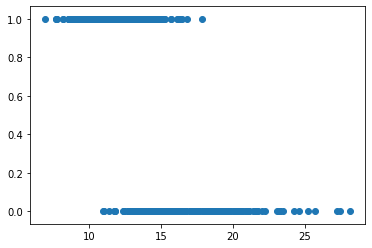

In [46]:
plt.scatter(X, Y)
plt.show()

In [49]:
X = np.c_[np.ones(data.data.shape[0]), X]
Theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

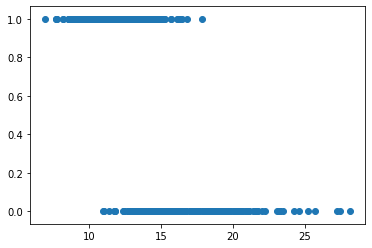

In [50]:
plt.scatter(X[:,1], Y)
plt.show()

In [51]:
Theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
DB = (0.5 - Theta[0])/Theta[1]

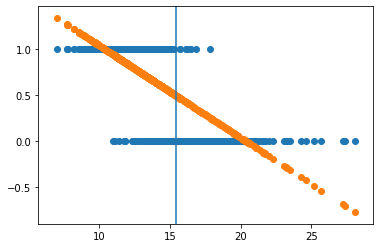

In [52]:
plt.scatter(X[:,1], Y)
plt.scatter(X[:,1], X.dot(Theta))
plt.axvline(DB)
plt.show()

---

# KNN classification
- https://nlp.stanford.edu/IR-book/newslides.html
- 14. Vector space classification (ppt2)

### 필기는 들리는대로..
- Rocchio는 거리를 구하는데 쓰는것이다. (수업 안하고 넘어감)
- robust: .... Y값을 바탕으로 가까운애들을 찾는데, Y가 틀렸을수도 있다(현실에러)
- train이 없다. 
    - = data-driven 방식: 데이터에 의해서 분류한다. 데이터가 모두 결정함.
    - lazy learning이라고도 한다. 
    - feature별로 값을 뿌려서 classification boundary를 만드는 과정을 train이라고 부르긴 한다.
    - Vector Space model(IR) 할때 document representation과 같다.
        - concept = feature (같은개념)
        - Vector Space model 검색엔진을 잘 만들면 classification과 Sentimental analysis가 가능하다는게 이 말이었다!

In [59]:
# dummy dataset 만들기.

from random import randint

N = 20
X = list((randint(1,50), randint(1,50))
         for _ in range(N))
Y = list(randint(0, 1) for _ in range(N)) # binary classification

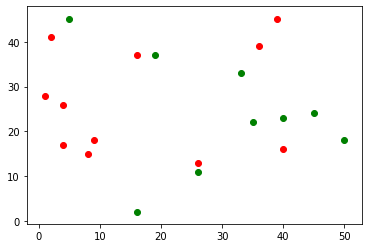

In [60]:
for x, y in list(zip(X, Y)):
    plt.scatter(x[0], x[1], color="r" if y == 0 else "g")
plt.show()

In [61]:
D = (randint(0, 50), randint(0, 50))

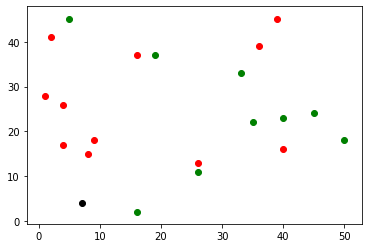

In [67]:
for x, y in list(zip(X, Y)):
    plt.scatter(x[0], x[1], color="r" if y == 0 else "g")
plt.scatter(D[0], D[1], color="k")
plt.show()

In [71]:
from math import sqrt

sqrtN = int(sqrt(len(X)))
K = sqrtN if sqrtN % 2 == 1 else sqrtN + 1
K

5

In [76]:
dist = lambda x1, x2: sqrt((x1[0]-x2[0])**2\
                           + (x1[1]-x2[1]**2))
angle = lambda x1, x2: (x1[0]*x2[0]+x1[1]*x2[1]) \
        / (dist(x1, (0, 0)) * dist(x2, (0,0)))

In [77]:
dist(X[0], D), angle(X[0], D)

(3.1622776601683795, 2.29549487932229)

In [78]:
result = list()
for x, y in zip(X, Y):
    result.append((x, y, dist(x, D)))

In [79]:
sorted(result, key=lambda x:x[2])[:K]

[((8, 15), 0, 0.0),
 ((9, 18), 0, 2.449489742783178),
 ((4, 17), 0, 3.1622776601683795),
 ((4, 26), 0, 4.358898943540674),
 ((5, 45), 1, 5.744562646538029)]

In [82]:
c0 = 0
for x, y, sim in sorted(result, key=lambda x:x[2])[:K]:
    if y == 0:
        c0 += 1

In [83]:
p_c0 = c0/K
p_c1 = 1 - p_c0

In [85]:
0 if p_c0 > p_c1 else 1

0

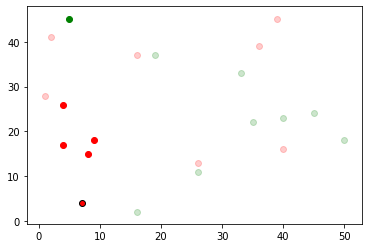

In [88]:
sqrtN = int(sqrt(len(X)))
K = sqrtN if sqrtN % 2 == 1 else sqrtN + 1 
# 보통 논문에서 K를 기준을 이렇게 잡고 시작한다고 함.

result = list()
for x, y in zip(X, Y):
    result.append((x, y, dist(x, D)))
    
c0 = 0
for x, y, sim in sorted(result, key=lambda x:x[2])[:K]:
    if y == 0:
        c0 += 1
        
nn = [_[0] for _ in sorted(result, key=lambda x:x[2])[:K]]
        
p_c0 = c0/K
p_c1 = 1 - p_c0

for x, y in list(zip(X, Y)):
    plt.scatter(x[0], x[1], color="r" if y == 0 else "g",
               alpha=0.2 if x not in nn else 1.0)
plt.scatter(D[0], D[1], edgecolor="k", 
            color="r" if p_c0 > p_c1 else "g")

plt.show()

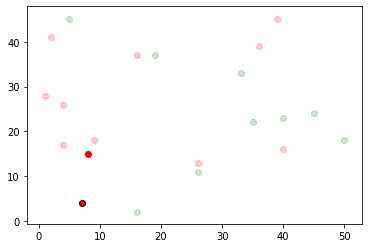

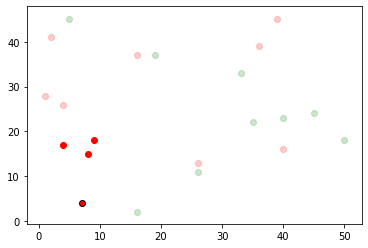

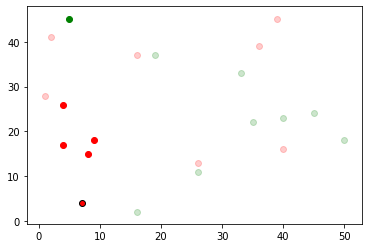

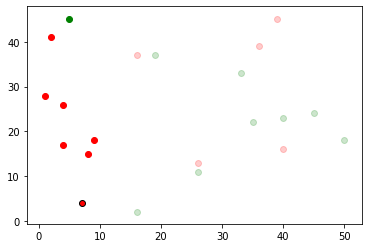

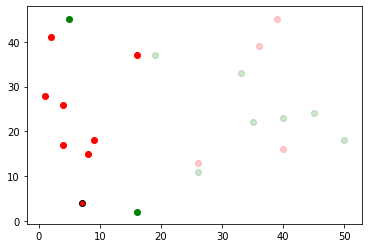

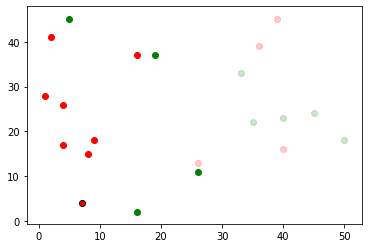

In [94]:
# K값 바꿔보기

sqrtN = int(sqrt(len(X)))
# _K = sqrtN if sqrtN % 2 == 1 else sqrtN + 1
_K = 11

for i in range(1, _K+1, 2):
    K = i
    result = list()
    for x, y in zip(X, Y):
        result.append((x, y, dist(x, D)))

    c0 = 0
    for x, y, sim in sorted(result, 
                            key=lambda x:x[2])[:K]:
        if y == 0:
            c0 += 1

    nn = [_[0] for _ in sorted(result, key=lambda x:x[2])[:K]]

    p_c0 = c0/K
    p_c1 = 1 - p_c0

    for x, y in list(zip(X, Y)):
        plt.scatter(x[0], x[1], color="r" if y == 0 else "g",
                   alpha=0.2 if x not in nn else 1.0)
    plt.scatter(D[0], D[1], edgecolor="k", 
                color="r" if p_c0 > p_c1 else "g")

    plt.show()

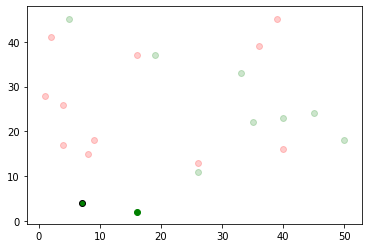

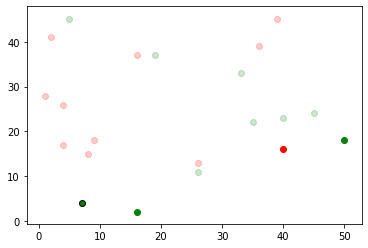

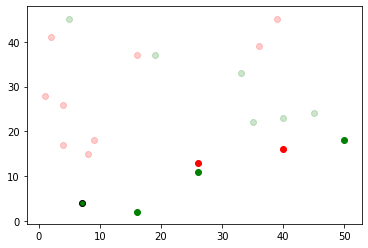

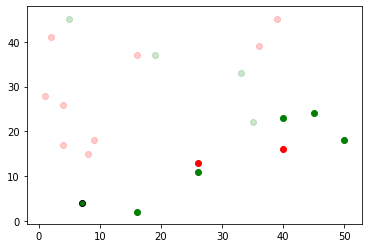

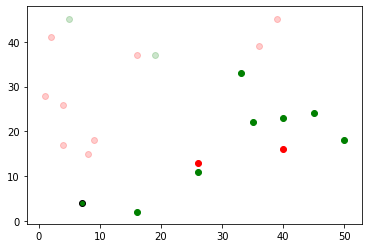

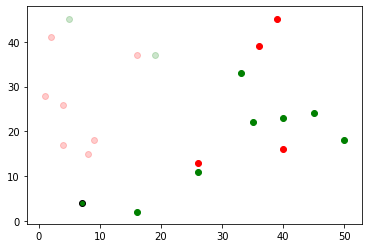

In [95]:
# angle로 바꿔보기

sqrtN = int(sqrt(len(X)))
# _K = sqrtN if sqrtN % 2 == 1 else sqrtN + 1
_K = 11

for i in range(1, _K+1, 2):
    K = i
    result = list()
    for x, y in zip(X, Y):
#         result.append((x, y, dist(x, D)))
        result.append((x, y, angle(x, D)))

    c0 = 0
    for x, y, sim in sorted(result, 
                            key=lambda x:x[2])[:K]:
        if y == 0:
            c0 += 1

    nn = [_[0] for _ in sorted(result, key=lambda x:x[2])[:K]]

    p_c0 = c0/K
    p_c1 = 1 - p_c0

    for x, y in list(zip(X, Y)):
        plt.scatter(x[0], x[1], color="r" if y == 0 else "g",
                   alpha=0.2 if x not in nn else 1.0)
    plt.scatter(D[0], D[1], edgecolor="k", 
                color="r" if p_c0 > p_c1 else "g")

    plt.show()